In [3]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pylab as plt

In [4]:
df=pd.read_csv('/content/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
df.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


In [6]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [9]:
df['target'].value_counts()

,count
target,
1,526
0,499


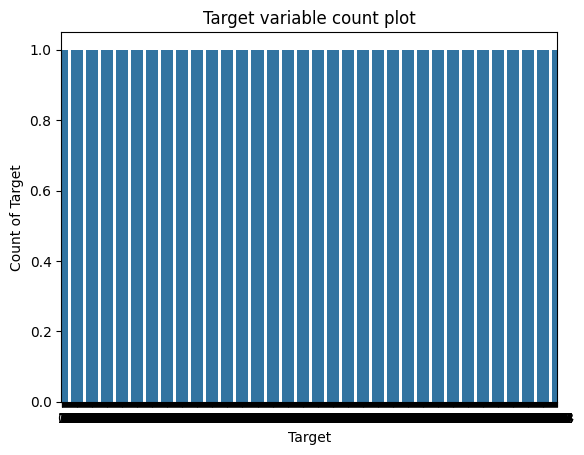

In [11]:
sns.countplot(df['target'])
plt.xlabel('Target')
plt.ylabel('Count of Target')
plt.title('Target variable count plot')
plt.show()

In [13]:
x=df.drop('target',axis=1)
y=df['target']
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
1020,1
1021,0
1022,0
1023,1


In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=2)

In [15]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(criterion="gini",max_depth=8,min_samples_split=10,random_state=5)

In [17]:
clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=8, min_samples_split=10, random_state=5)

In [18]:
clf.feature_importances_

array([0.08096531, 0.03188999, 0.18112494, 0.06259496, 0.06198552,
       0.00642659, 0.01145026, 0.08697963, 0.05237158, 0.12591276,
       0.04012161, 0.13174895, 0.12642789])

In [19]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [20]:
y_pred=clf.predict(x_test)
y_pred

array([0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[158,   6],
       [  7, 137]])

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9577922077922078

In [25]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf,x_train,y_train, cv=10)

array([0.95833333, 0.95833333, 0.90277778, 0.97222222, 0.97222222,
       0.98611111, 0.94444444, 0.97183099, 0.98591549, 0.94366197])

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       165
           1       0.95      0.96      0.95       143

    accuracy                           0.96       308
   macro avg       0.96      0.96      0.96       308
weighted avg       0.96      0.96      0.96       308



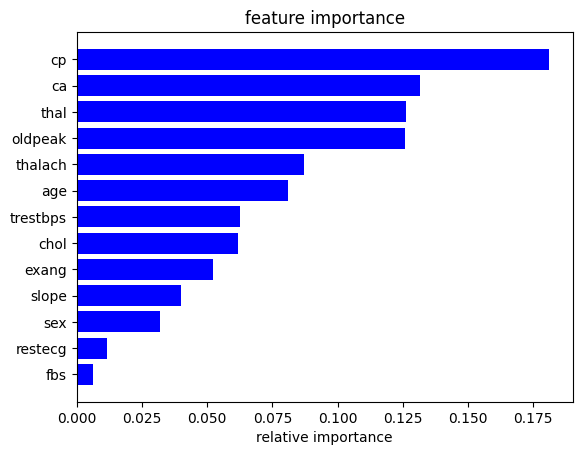

In [33]:
features=df.columns
importance=clf.feature_importances_
indices=np.argsort(importance)

plt.title('feature importance')
plt.barh(range(len(indices)), importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('relative importance')
plt.show()